# Regular expression doesn't work for html
check https://stackoverflow.com/questions/590747/using-regular-expressions-to-parse-html-why-not

# Trial with beautiful soup

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings("ignore")

url = 'file:///Users/zhangyumeng/Desktop/GSFM/Keyword%20search%20results_me/748268_8-K_2020-10-05_0001554795-20-000254.html'
html = urlopen(url).read()
soup = BeautifulSoup(html,"html5lib")

In [2]:
searched_word ='storage'
results = soup.body.find_all(string=re.compile('.*{0}.*'.format(searched_word)), recursive=True)
print('Found the word "{0}" {1} times\n'.format(searched_word, len(results)))
print(results)

Found the word "storage" 1 times

['-based distributed storage analytics and SaaS solutions for adoption in the drone industry. Red Cat supports education training and sales of drone products through its Rotor Riot platform and is developing the means to accurately track report and review f .....']


# Function to identify a list of defined words

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import os
import pandas as pd
import re

def process_html(path,searched_words):
    html_files = os.listdir(path)
    dict_for_words = {}
    for word in searched_words:
        lst = []
        for file in html_files:
            f = os.path.join(path, file)
            url = 'file://' + f
            html = urlopen(url).read()
            soup = BeautifulSoup(html,"html5lib")
            results = soup.body.find_all(string=re.compile('.*{0}.*'.format(word)))
            if len(results) > 0 and 'Blockchain' not in soup.br.next_sibling:
                lst.append(soup.br.next_sibling.replace('Company Name: ','')) 
        dict_for_words[word] = pd.Series(list(set(lst)))
        df = pd.DataFrame.from_dict(dict_for_words)
    return df

# Function test

In [4]:
searched_words = ['storage','accounting','supply', 'payments','SaaS','cryptocurrency','NFT','creation','security','identity']
path = '/Users/zhangyumeng/Desktop/GSFM/Keyword search results_full'

In [5]:
result = process_html(path,searched_words)

In [6]:
result

,storage,accounting,supply,payments,SaaS,cryptocurrency,NFT,creation,security,identity
0,TimefireVR Inc,Chineseinvestors com Inc,TURNER VALLEY OIL GAS INC,AppCoin Innovations Inc,Red Cat Holdings Inc,Chineseinvestors com Inc,CurrencyWorks Inc,NEW YORK COMMUNITY BANCORP INC,OLB GROUP INC,TrueNorth Quantum Inc
1,W Technologies Inc,Future FinTech Group Inc,OLB GROUP INC,National Bank Holdings Corp,IMAGEWARE SYSTEMS INC,HPIL HOLDING,SANTO MINING CORP,WEWARDS INC,China VTV Ltd,Roth CH Acquisition II Co
2,Celebiddy Inc,ORANCO INC,EXPEDITORS INTERNATIONAL OF WASHINGTON INC,B4MC GOLD MINES INC,NaN,OLB GROUP INC,GOOD GAMING INC,W Technologies Inc,Hidden Forest Acquisition Corp,AppCoin Innovations Inc
3,Red Cat Holdings Inc,First Colombia Development Corp,Red Cat Holdings Inc,CLIC TECHNOLOGY INC,NaN,Noble Vici Group Inc,Troika Media Group Inc,Cosmos Group Holdings Inc,ION Acquisition Corp 3 Ltd,National Bank Holdings Corp
4,ADVANCED CREDIT TECHNOLOGIES INC,AppCoin Innovations Inc,Code Chain New Continent Ltd,Net Element Inc,NaN,AppCoin Innovations Inc,Roth CH Acquisition II Co,NaN,ADVANCED CREDIT TECHNOLOGIES INC,NaN
5,AppCoin Innovations Inc,Snap Interactive Inc,ADVANCED CREDIT TECHNOLOGIES INC,IWEB Inc,NaN,Aedan Financial Corp,Cosmos Group Holdings Inc,NaN,Sino Global Shipping America Ltd,NaN
6,SOLLENSYS CORP,Cabinet Grow Inc,Technovative Group Inc,NaN,NaN,Force Protection Video Equipment Corp,Biopower Operations Corp,NaN,Noble Vici Group Inc,NaN
7,Moms Online Inc,Mr Amazing Loans Corp,Troika Media Group Inc,NaN,NaN,DIAMONDHEAD CASINO CORP,NaN,NaN,Global Arena Holding Inc,NaN
8,NaN,STERLING CONSOLIDATED Corp,SOLLENSYS CORP,NaN,NaN,Sipup Corp,NaN,NaN,UNION BRIDGE HOLDINGS LTD,NaN
9,NaN,GigWorld Inc,ROCKETFUEL BLOCKCHAIN INC,NaN,NaN,Creek Road Miners Inc,NaN,NaN,OBITX Inc,NaN


Text(0.5, 1.0, 'Keyword Count')

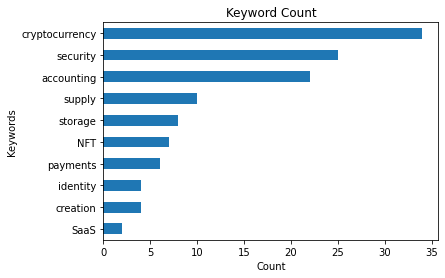

In [7]:
bar = result.count()
ax = bar.sort_values(ascending=True).plot.barh()
ax.set_ylabel('Keywords')
ax.set_xlabel('Count')
ax.set_title('Keyword Count')